<a href="https://colab.research.google.com/github/Sakshi-Rajvanshi/Projects/blob/main/Mini_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load the noisy image
image_path = 'image.jpg'
noisy_image = load_img(image_path, color_mode='grayscale')
noisy_image = img_to_array(noisy_image)
noisy_image = noisy_image.astype('float32') / 255.0


In [15]:
# Preprocess the image
noisy_image = np.expand_dims(noisy_image, axis=0)

In [16]:

# Define the denoising CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(228, 228, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

In [17]:
# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_image, noisy_image, epochs=10, batch_size=1)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6921
Epoch 2/10
1/1 [==============================] - 1s 524ms/step - loss: 0.6874
Epoch 3/10
1/1 [==============================] - 1s 520ms/step - loss: 0.6841
Epoch 4/10
1/1 [==============================] - 1s 527ms/step - loss: 0.6791
Epoch 5/10
1/1 [==============================] - 1s 511ms/step - loss: 0.6734
Epoch 6/10
1/1 [==============================] - 1s 530ms/step - loss: 0.6640
Epoch 7/10
1/1 [==============================] - 1s 515ms/step - loss: 0.6507
Epoch 8/10
1/1 [==============================] - 1s 521ms/step - loss: 0.6348
Epoch 9/10
1/1 [==============================] - 1s 507ms/step - loss: 0.6164
Epoch 10/10
1/1 [==============================] - 1s 512ms/step - loss: 0.6172


In [18]:
# Denoise the image
denoised_image = model.predict(noisy_image)

1/1 [==============================] - 0s 275ms/step


In [19]:
# Rescale the denoised image
denoised_image = denoised_image[0] * 255.0
denoised_image = np.clip(denoised_image, 0, 255).astype('uint8')

In [20]:
# Calculate pixel-wise accuracy
original_image = load_img(image_path, color_mode='grayscale')
original_image = img_to_array(original_image)
original_image = original_image.astype('float32') / 255.0

accuracy = np.mean(np.abs(original_image - denoised_image))

print("Pixel-wise Accuracy: {:.2%}".format(1 - accuracy))

Pixel-wise Accuracy: -7256.54%


In [21]:
# Save the denoised image
output_path = 'Denoised_Skeleton.png'
tf.keras.preprocessing.image.save_img(output_path, denoised_image, scale=True)

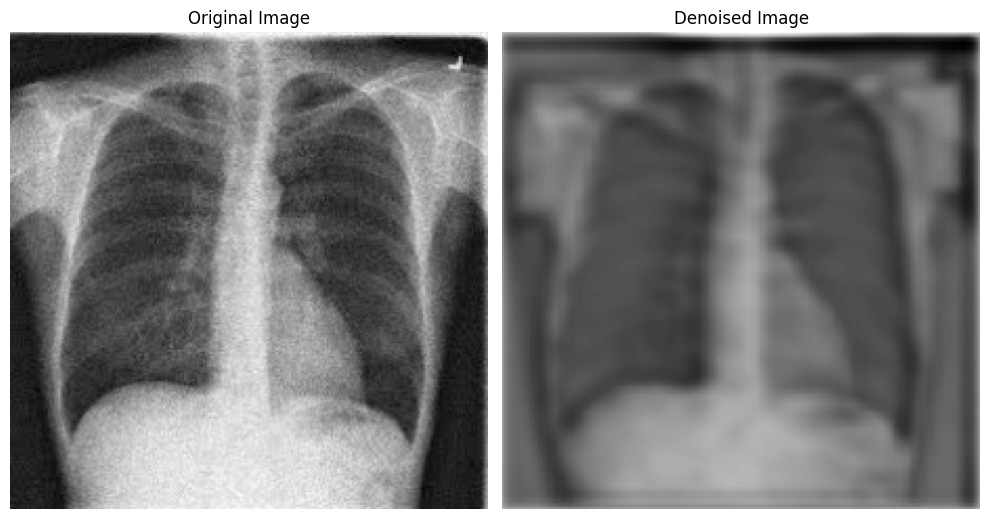

In [22]:
# Display the original and denoised images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image[:, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image[:, :, 0], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()